# Medical Cost Data Interpretation

From this project, we will determine why the insurance cost varies from person to person using the factors like age,gender,BMI(weight of the person),region(where he resides),smoking habit(smoker or not) and children the person has!!

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [2]:
dataset=pd.read_csv(r'C:\Users\rohin\OneDrive\Desktop\Datasets\Medical Cost.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1330 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1330.000000,1338.000000,1338.000000
mean,39.207025,30.664289,1.094918,13270.422265
std,14.049960,6.093764,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.656250,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#checking for null values
dataset.isnull().any()

age         False
sex         False
bmi          True
children    False
smoker       True
region      False
charges     False
dtype: bool

In [8]:
#checking for how many missing values
dataset.isnull().sum()

age         0
sex         0
bmi         8
children    0
smoker      3
region      0
charges     0
dtype: int64

# DATA PREPROCESSING

# Handling the Missing values

In [9]:
dataset.mean()

age            39.207025
bmi            30.664289
children        1.094918
charges     13270.422265
dtype: float64

In [10]:
#filling the missing values with mean
dataset.fillna(dataset.mean(),inplace=True)

In [11]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker       True
region      False
charges     False
dtype: bool

In [12]:
dataset["smoker"].value_counts()

no     1062
yes     273
Name: smoker, dtype: int64

In [13]:
#dropping the null values
dataset.dropna(inplace=True)

In [14]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [15]:
dataset.shape

(1335, 7)

# Descriptive Statistics

In [16]:
dataset.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# Age

In [17]:
dataset["age"].nunique()

47

In [18]:
dataset["age"].describe()

count    1335.000000
mean       39.201498
std        14.042098
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

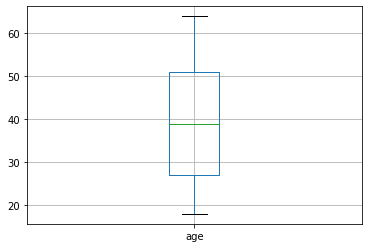

In [19]:
dataset.boxplot("age")

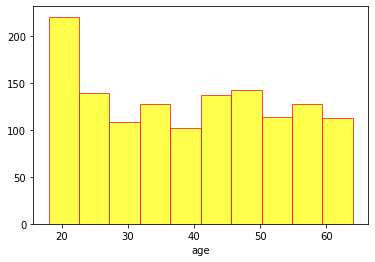

In [20]:
plt.hist(dataset.age, color='yellow', edgecolor = 'red', alpha = 0.7)
plt.xlabel('age')
plt.show()

# Observations(Age)

Most of the persons who took insurance are between 27-51 of age and no outliers

Age is uniformly distributed

# Sex

In [21]:
fdt_sex=dataset["sex"].value_counts()

In [22]:
fdt_sex

male      674
female    661
Name: sex, dtype: int64

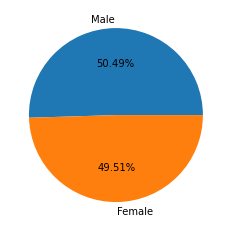

In [23]:
plt.pie(fdt_sex.values,labels=["Male","Female"],autopct='%.2f%%')
plt.show()

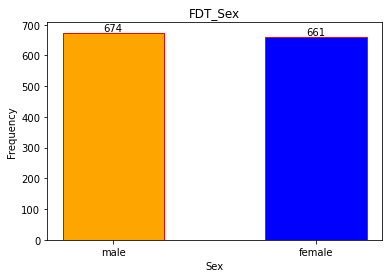

In [24]:
plt.bar(fdt_sex.index,fdt_sex.values,color=['orange','blue'],edgecolor='red',width=0.5)
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("FDT_Sex")
for x,y in enumerate(fdt_sex.values):
    plt.text(x,y+0.05,'%d'%y,ha='center',va='bottom')
plt.show()

# Observations(Sex)

Male(674) people are only 1% more than Female(661) in taking the Insurance

# Region

In [25]:
fdt_region=dataset["region"].value_counts()

In [26]:
fdt_region

southeast    363
northwest    325
northeast    324
southwest    323
Name: region, dtype: int64

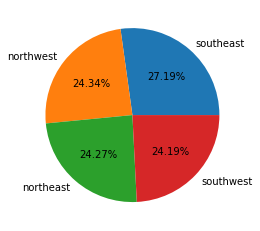

In [27]:
plt.pie(fdt_region.values,labels=["southeast","northwest","northeast","southwest"],autopct='%.2f%%')
plt.show()

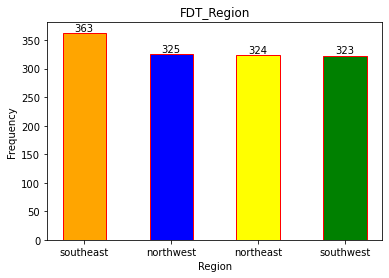

In [28]:
plt.bar(fdt_region.index,fdt_region.values,color=['orange','blue','yellow','green'],edgecolor='red',width=0.5)
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("FDT_Region")
for x,y in enumerate(fdt_region.values):
    plt.text(x,y+0.05,'%d'%y,ha='center',va='bottom')
plt.show()

In [29]:
dataset["region"].describe()

count          1335
unique            4
top       southeast
freq            363
Name: region, dtype: object

# Observations(Region)

People of southeast(363) tops it comparing to other regions in taking the insurance while the other regions vary of 1 insurance with eachother

# Children

In [30]:
dataset['children'].value_counts()

0    573
1    322
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [31]:
fdt_children= dataset['children'].value_counts()  

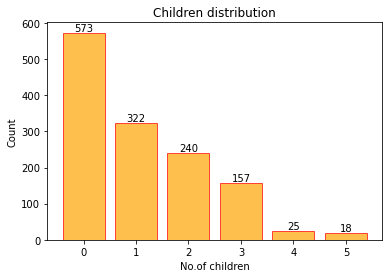

In [32]:
plt.bar(fdt_children.index,fdt_children.values, align='center',color = 'orange',edgecolor = 'red',alpha = 0.7)
plt.xlabel('No.of children')
plt.ylabel('Count')
plt.title("Children distribution")
for x,y in enumerate(fdt_children.values):
    plt.text(x,y+0.05,'%d'%y,ha='center',va='bottom')
plt.show()

# Observations(Children)

Most of the people have less than 2 children and very few have 4 or 5 children

we can see that 18 people have 5 children and 574 people have 0 children

# SMOKER

In [33]:
dataset['smoker'].describe()

count     1335
unique       2
top         no
freq      1062
Name: smoker, dtype: object

In [34]:
fdt_smoker= dataset['smoker'].value_counts()   

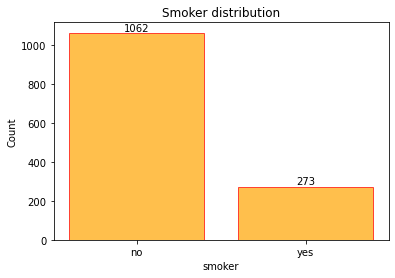

In [35]:
plt.bar(fdt_smoker.index,fdt_smoker.values, align='center',color = 'orange',edgecolor = 'red',alpha = 0.7)  #plot a bar chart
plt.xlabel('smoker')
plt.ylabel('Count')
plt.title("Smoker distribution")
for x,y in enumerate(fdt_smoker.values):
    plt.text(x,y+0.05,'%d'%y,ha='center',va='bottom')
plt.show()

# Observations(Smoker)

smokers are comparatively less than non-smokers

# BMI

In [36]:
dataset['bmi'].describe()

count    1335.000000
mean       30.659835
std         6.074329
min        15.960000
25%        26.315000
50%        30.495000
75%        34.590000
max        53.130000
Name: bmi, dtype: float64

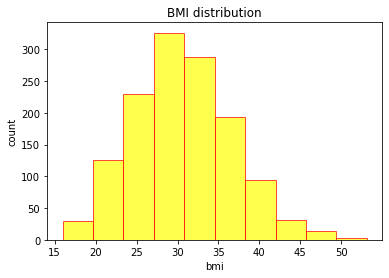

In [37]:
plt.hist(dataset.bmi,color='yellow', edgecolor = 'red', alpha = 0.7)
plt.xlabel('bmi')
plt.ylabel('count')
plt.title('BMI distribution')
plt.show()

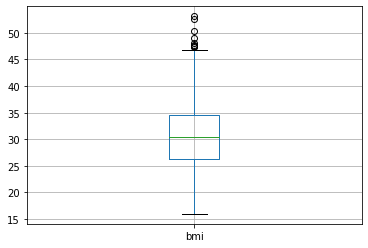

In [38]:
dataset.boxplot('bmi')

# Observations(BMI)

BMI looks normally distributed and it's highly skewed

Most of the people weigh between 15-53

# Charges

In [39]:
dataset['charges'].describe()

count     1335.000000
mean     13256.609590
std      12081.052321
min       1121.873900
25%       4742.306100
50%       9386.161300
75%      16622.107580
max      63770.428010
Name: charges, dtype: float64

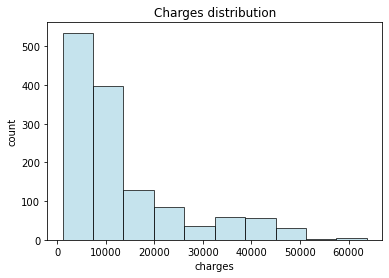

In [40]:
plt.hist(dataset.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')
plt.ylabel('count')
plt.title('Charges distribution')
plt.show()

# Observations(charge)

The charges are assymetrically skewes to the right

Most of the people are paying between 1100-16000

# Distribution of Smoker and Charges across different ages

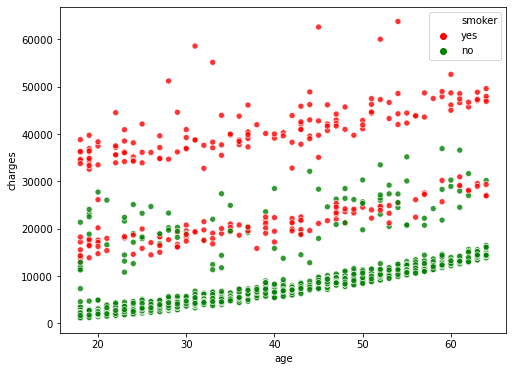

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(dataset.age, dataset.charges,hue=dataset.smoker,palette= ['red','green'] ,alpha=0.8)
plt.show()

# Observations

Non-smokers are paying very less compartively to smokers

# Children vs Smoker

In [42]:
pd.crosstab(dataset['children'],dataset['smoker'])

smoker,no,yes
children,,
0,459,114
1,261,61
2,185,55
3,118,39
4,22,3
5,17,1


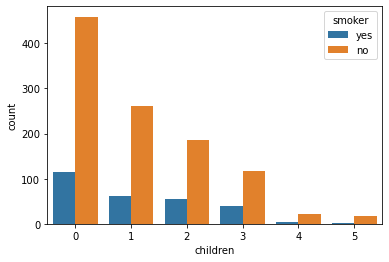

In [43]:
sns.countplot(dataset['children'],hue=dataset['smoker'])
plt.show()


# Observations(Children vs smoker)



we can see that 459 not smoker people have 0 children and 115 smoker people have 0 children.
like wise, 17 not smoker people have 5 children and 1 smoker people have 5 children

# Charges Vs Smoker

In [44]:
group_smokercharge=dataset.groupby("smoker")

In [45]:
group_smokercharge.mean()["charges"]

smoker
no      8440.662563
yes    31991.172750
Name: charges, dtype: float64

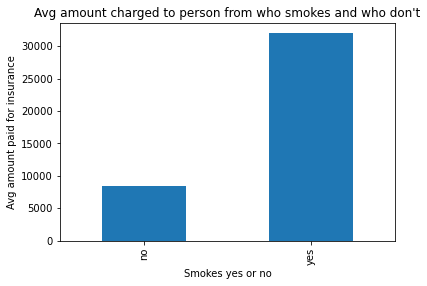

In [46]:
group_smokercharge.mean()["charges"].plot(kind="bar")
plt.xlabel("Smokes yes or no")
plt.ylabel("Avg amount paid for insurance")
plt.title("Avg amount charged to person from who smokes and who don't")
plt.show()

# Observations Smoker vs Charges

The person who smokes pays more for insurance than the person who don't

# Charges vs Region

In [47]:
group_regioncharge=dataset.groupby("region")

In [48]:
group_regioncharge.mean()["charges"]

region
northeast    13406.384516
northwest    12417.575374
southeast    14753.303509
southwest    12268.557429
Name: charges, dtype: float64

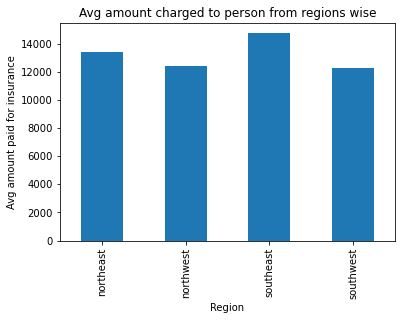

In [49]:
group_regioncharge.mean()["charges"].plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Avg amount paid for insurance")
plt.title("Avg amount charged to person from regions wise")
plt.show()

# Observations Region vs Charges

Region wise, people from southeast pays more amount than the other regions followed by northeast
whereas the people from west regions, pays nearly equal amount comparatively less than east regions

# Sex vs charges

In [50]:
group_sexcharge=dataset.groupby("sex")

In [51]:
group_sexcharge.mean()["charges"]

sex
female    12576.127995
male      13923.966169
Name: charges, dtype: float64

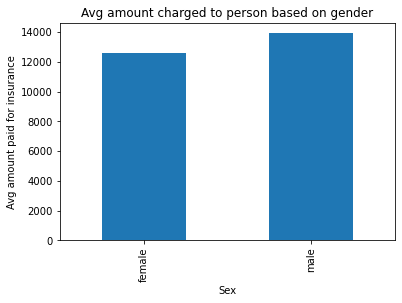

In [52]:
group_sexcharge.mean()["charges"].plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Avg amount paid for insurance")
plt.title("Avg amount charged to person based on gender")
plt.show()

# Observations Sex vs Charges

Male people are charged $1500 more comparing to female

# Bmi Vs Region

In [53]:
group_bmiregion=dataset.groupby("region")

In [54]:
group_bmiregion.mean()["bmi"]

region
northeast    29.170086
northwest    29.228888
southeast    33.347434
southwest    30.573574
Name: bmi, dtype: float64

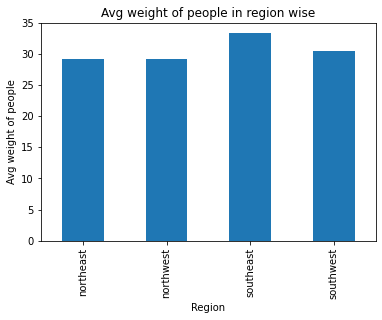

In [55]:
group_bmiregion.mean()["bmi"].plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Avg weight of people")
plt.title("Avg weight of people in region wise")
plt.show()

# Observations for (bmi vs region)

1. Average weight of people who resides in southeast is high followed by southwest.
2. Average weight of people in Northeast and Northwest are almost equal

# Smoker vs BMI

In [56]:
group_bmismoker=dataset.groupby("smoker")

In [57]:
group_bmismoker.mean()["bmi"]

smoker
no     30.656758
yes    30.671803
Name: bmi, dtype: float64

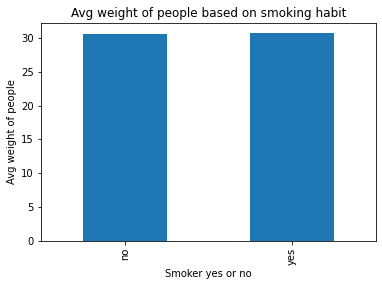

In [58]:
group_bmismoker.mean()["bmi"].plot(kind="bar")
plt.xlabel("Smoker yes or no")
plt.ylabel("Avg weight of people")
plt.title("Avg weight of people based on smoking habit")
plt.show()

# Observations BMI VS SMOKER

The average weight of person who smokes and who don't are equal

# Sex vs BMI

In [59]:
group_bmisex=dataset.groupby("sex")

In [60]:
group_bmisex.mean()["bmi"]

sex
female    30.375517
male      30.938669
Name: bmi, dtype: float64

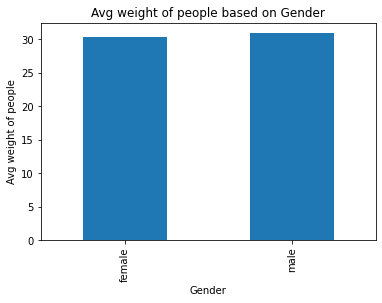

In [61]:
group_bmisex.mean()["bmi"].plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Avg weight of people")
plt.title("Avg weight of people based on Gender")
plt.show()

# Observations Gender vs BMI

1.Male and Female are equal in weight

# Region vs Sex

In [62]:
pd.crosstab(dataset['region'],dataset['sex'])

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,174,189
southwest,162,161


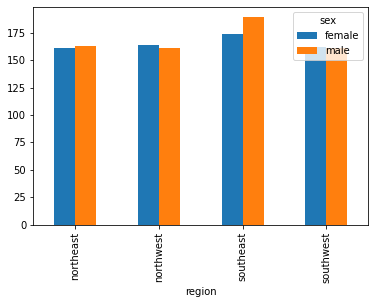

In [63]:
pd.crosstab(dataset['region'],dataset['sex']).plot(kind='bar')

# observations(Region vs sex)

Male from Southeast pays more amount for insurance

In [64]:
gp_c=dataset.groupby("smoker")

In [65]:
gp_c.groups

{'no': Int64Index([   1,    2,    3,    4,    5,    7,    8,    9,   10,   12,
             ...
             1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336],
            dtype='int64', length=1062),
 'yes': Int64Index([   0,   11,   14,   19,   23,   29,   30,   34,   38,   49,
             ...
             1303, 1304, 1306, 1307, 1308, 1313, 1314, 1321, 1323, 1337],
            dtype='int64', length=273)}

In [66]:
gp_c.sum()["charges"]

smoker
no     8.963984e+06
yes    8.733590e+06
Name: charges, dtype: float64

In [67]:
gp_c.mean()["bmi"]

smoker
no     30.656758
yes    30.671803
Name: bmi, dtype: float64

In [68]:

aggr=gp_c.agg({"charges":["mean","skew","var","count"],"bmi":["median","var","std"]})

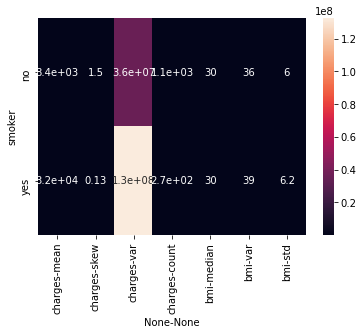

In [69]:
sns.heatmap(aggr,annot=True)

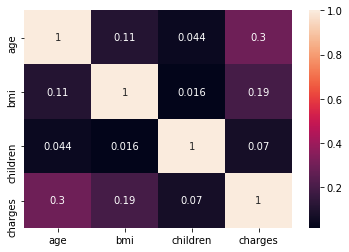

In [71]:
sns.heatmap(dataset.corr(),annot=True)

we see that smoking is the feature who has the most effect on the charges. Followed by age and bmi.

# PAIRPLOTS(relation between all features)

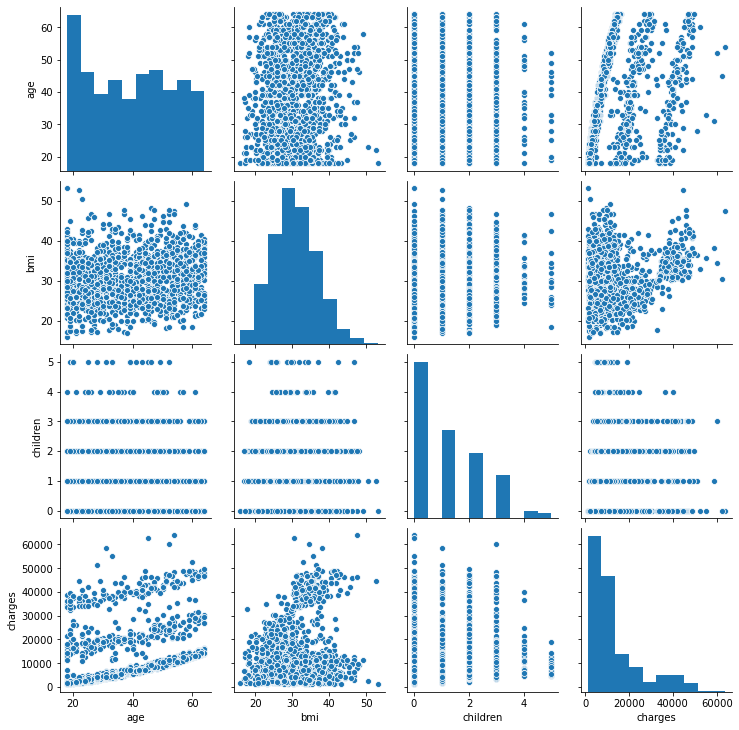

In [70]:
sns.pairplot(dataset)
plt.show()

# SUMMARY

1)Most of the persons who took insurance are between 27-51 of age and age is uniformly distributed

2)Male(674) people are only 1% more than Female(661) in taking the Insurance and they're paying 1500 dollars more than females.

3)People of southeast(363) tops it comparing to other regions in taking the insurance while the other regions vary of 1 insurance with eachother 

4)Region wise, people from southeast pays more amount than the other regions followed by northeast whereas the people from west regions, pays nearly equal amount comparatively less than east regions

5)Male from Southeast pays more amount for insurance

6)BMI looks normally distributed and it's highly skewed where Male and Female are equal in weight with most of the people weigh between 15-53

7)The charges are assymetrically skewes to the right and most of the people are paying between 1100-16000

8)smokers are comparatively less than non-smokers and Non-smokers are paying very less compartively to smokers

9)we can see that 459 not smoker people have 0 children and 115 smoker people have 0 children. like wise, 17 not smoker people have 5 children and 1 smoker people have 5 children

10)we see that smoking is the feature who has the most effect on the charges.